##### A company's campaigns have not been as effective as they were expected to be and thus we are asked to analyze the data to understand this probelm and propose data-driven solutions.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_palette("Blues_r")
import matplotlib.pyplot as plt

import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('marketing_data.csv')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


#### Column Details:

- ID: Customer's Unique Identifier
- Year_Birth: Customer's Birth Year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- MntWines: Amount spent on wine in the last 2 years
- MntFruits: Amount spent on fruits in the last 2 years
- MntMeatProducts: Amount spent on meat in the last 2 years
- MntFishProducts: Amount spent on fish in the last 2 years
- MntSweetProducts: Amount spent on sweets in the last 2 years
- MntGoldProds: Amount spent on gold in the last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- NumWebPurchases: Number of purchases made through the company's web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company's web site in the last month
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise (Target variable)
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise (Target variable)
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise (Target variable)
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise (Target variable)
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise (Target variable)
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise (Target variable)
- Complain: 1 if customer complained in the last 2 years, 0 otherwise
- Country: Customer's location

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

### Data Cleaning

**1. Removing Irrelevant Column/s-**

In [4]:
data.drop(columns=['ID'], inplace=True)

**2. Eliminating leading/trailing whitespaces from column names-**

In [5]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', ' Income ', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [6]:
data.columns = data.columns.str.strip()

In [7]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

**3. Handling Data Inconsistencies-**

In [8]:
data['Income'] = data['Income'].str.replace("$","").str.replace(",","").astype(float)

In [9]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

### Encoding Categorical Varaibles

In [10]:
data['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

In [11]:
data['Marital_Status'] = data['Marital_Status'].map({'Divorce':1, "Single":1, "Married":2, "YOLO":1, "Absurd":1, "Alone":1, "Widow":1, "Together":2})

In [12]:
data['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [13]:
data['Country'].value_counts()

Country
SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: count, dtype: int64

In [14]:
"""idx_Education = data.columns.get_loc('Education')
idx_Country = data.columns.get_loc('Country')"""

"idx_Education = data.columns.get_loc('Education')\nidx_Country = data.columns.get_loc('Country')"

In [15]:
"""trf1 = ColumnTransformer([
    ("One_Hot_Encoding",OneHotEncoder(),[idx_Education, idx_Country])
], remainder='passthrough', verbose_feature_names_out=False)"""

'trf1 = ColumnTransformer([\n    ("One_Hot_Encoding",OneHotEncoder(),[idx_Education, idx_Country])\n], remainder=\'passthrough\', verbose_feature_names_out=False)'

In [16]:
#data = pd.DataFrame(trf1.fit_transform(data), columns= trf1.get_feature_names_out())
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1970,Graduation,NaN,84835.0,0,0,2014-06-16,0,189,104,...,6,1,0,0,0,0,0,1,0,SP
1,1961,Graduation,1.0,57091.0,0,0,2014-06-15,0,464,5,...,7,5,0,0,0,0,1,1,0,CA
2,1958,Graduation,2.0,67267.0,0,1,2014-05-13,0,134,11,...,5,2,0,0,0,0,0,0,0,US
3,1967,Graduation,2.0,32474.0,1,1,2014-05-11,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
4,1989,Graduation,1.0,21474.0,1,0,2014-04-08,0,6,16,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,PhD,NaN,66476.0,0,1,2013-03-07,99,372,18,...,11,4,0,0,0,0,0,0,0,US
2236,1977,2n Cycle,2.0,31056.0,1,0,2013-01-22,99,5,10,...,3,8,0,0,0,0,0,0,0,SP
2237,1976,Graduation,NaN,46310.0,1,0,2012-12-03,99,185,2,...,5,8,0,0,0,0,0,0,0,SP
2238,1978,Graduation,2.0,65819.0,0,0,2012-11-29,99,267,38,...,10,3,0,0,0,0,0,0,0,IND


### Handling Missing Values

1. Removing rows and columns with missing data
2. Impute missing values with a constant value (mean Or median)
3. Impute missing values using MICE or KNN Imputer

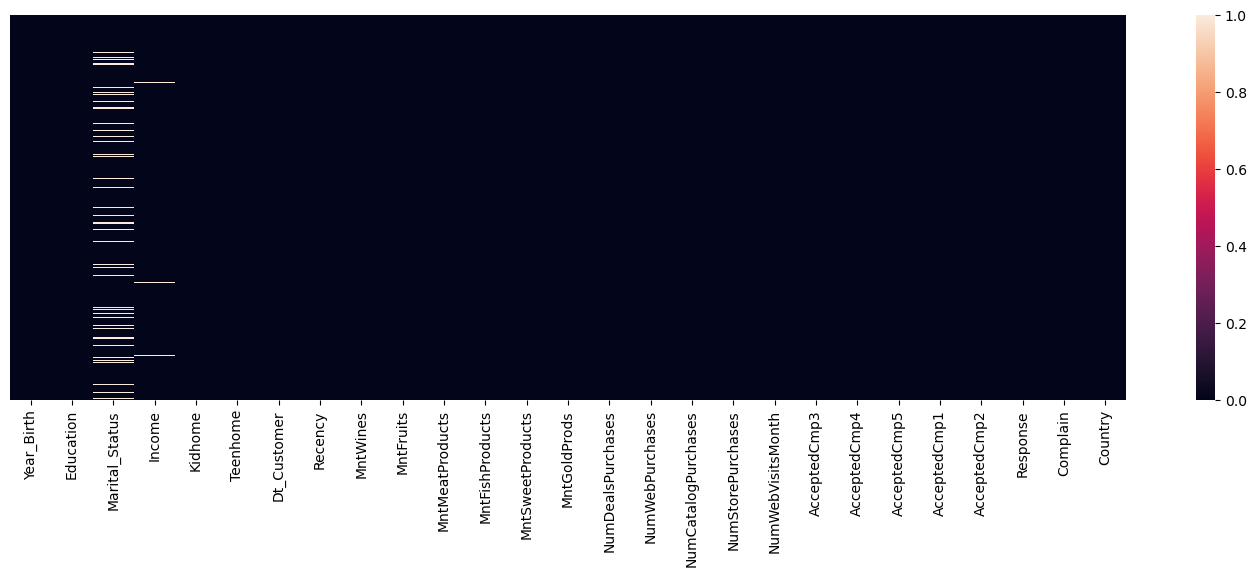

In [17]:
plt.figure(figsize=(18,5))
sns.heatmap(data.isna(), yticklabels=False)
plt.show()

In [18]:
data.isnull().mean()*100

Year_Birth              0.000000
Education               0.000000
Marital_Status         10.357143
Income                  1.071429
Kidhome                 0.000000
Teenhome                0.000000
Dt_Customer             0.000000
Recency                 0.000000
MntWines                0.000000
MntFruits               0.000000
MntMeatProducts         0.000000
MntFishProducts         0.000000
MntSweetProducts        0.000000
MntGoldProds            0.000000
NumDealsPurchases       0.000000
NumWebPurchases         0.000000
NumCatalogPurchases     0.000000
NumStorePurchases       0.000000
NumWebVisitsMonth       0.000000
AcceptedCmp3            0.000000
AcceptedCmp4            0.000000
AcceptedCmp5            0.000000
AcceptedCmp1            0.000000
AcceptedCmp2            0.000000
Response                0.000000
Complain                0.000000
Country                 0.000000
dtype: float64

- As, there are not much missing values, one might feel tempted to remove the rows containing missing values. But we will instead handle these missing values using different methods

In [19]:
missing_values = data.isnull().sum().sort_values(ascending = False)
print(missing_values[missing_values!=0])

Marital_Status    232
Income             24
dtype: int64


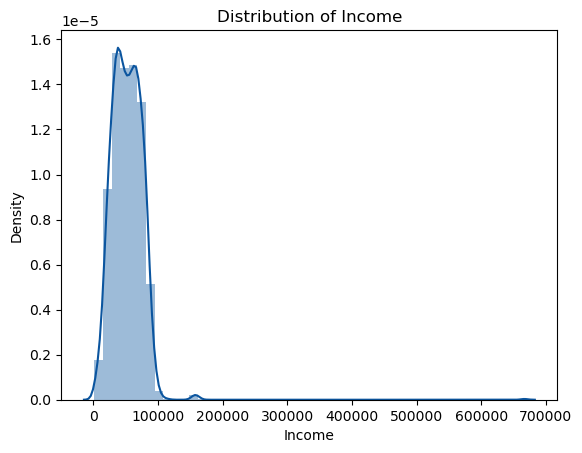

In [20]:
sns.distplot(data["Income"])
plt.title("Distribution of Income")
plt.show()

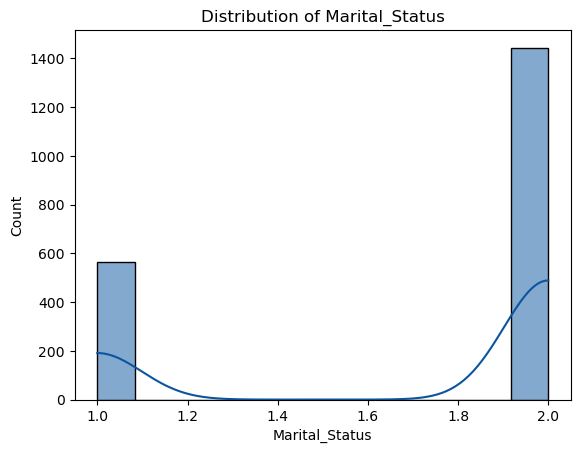

In [21]:
sns.histplot(data['Marital_Status'], kde=True)
plt.title("Distribution of Marital_Status")
plt.show()

In [22]:
idx_Income = data.columns.get_loc("Income")
idx_Marital_Status = data.columns.get_loc("Marital_Status")

In [23]:
trf2 = ColumnTransformer([
    ("KNN_Imputer", KNNImputer(), [idx_Income]),
    ("Simple_Imputer", SimpleImputer(strategy='most_frequent'), [idx_Marital_Status])
],remainder='passthrough', verbose_feature_names_out=False)

In [24]:
data1 =pd.DataFrame(trf2.fit_transform(data), columns=trf2.get_feature_names_out())
data1

,Income,Marital_Status,Year_Birth,Education,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,84835.0,2.0,1970,Graduation,0,0,2014-06-16,0,189,104,...,6,1,0,0,0,0,0,1,0,SP
1,57091.0,1.0,1961,Graduation,0,0,2014-06-15,0,464,5,...,7,5,0,0,0,0,1,1,0,CA
2,67267.0,2.0,1958,Graduation,0,1,2014-05-13,0,134,11,...,5,2,0,0,0,0,0,0,0,US
3,32474.0,2.0,1967,Graduation,1,1,2014-05-11,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
4,21474.0,1.0,1989,Graduation,1,0,2014-04-08,0,6,16,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,66476.0,2.0,1976,PhD,0,1,2013-03-07,99,372,18,...,11,4,0,0,0,0,0,0,0,US
2236,31056.0,2.0,1977,2n Cycle,1,0,2013-01-22,99,5,10,...,3,8,0,0,0,0,0,0,0,SP
2237,46310.0,2.0,1976,Graduation,1,0,2012-12-03,99,185,2,...,5,8,0,0,0,0,0,0,0,SP
2238,65819.0,2.0,1978,Graduation,0,0,2012-11-29,99,267,38,...,10,3,0,0,0,0,0,0,0,IND


In [25]:
data1.isnull().sum()

Income                 0
Marital_Status         0
Year_Birth             0
Education              0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

### Handling Outliers

In [26]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Income               2240 non-null   object        
 1   Marital_Status       2240 non-null   object        
 2   Year_Birth           2240 non-null   object        
 3   Education            2240 non-null   object        
 4   Kidhome              2240 non-null   object        
 5   Teenhome             2240 non-null   object        
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   object        
 8   MntWines             2240 non-null   object        
 9   MntFruits            2240 non-null   object        
 10  MntMeatProducts      2240 non-null   object        
 11  MntFishProducts      2240 non-null   object        
 12  MntSweetProducts     2240 non-null   object        
 13  MntGoldProds         2240 non-nul

In [27]:
box_plot_cols = [i for i in  data1.columns if data1[i].nunique()>8]
#box_plot_cols.remove('Education')
#box_plot_cols.remove('Country')
box_plot_cols.remove('Dt_Customer')
box_plot_cols

['Income',
 'Year_Birth',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

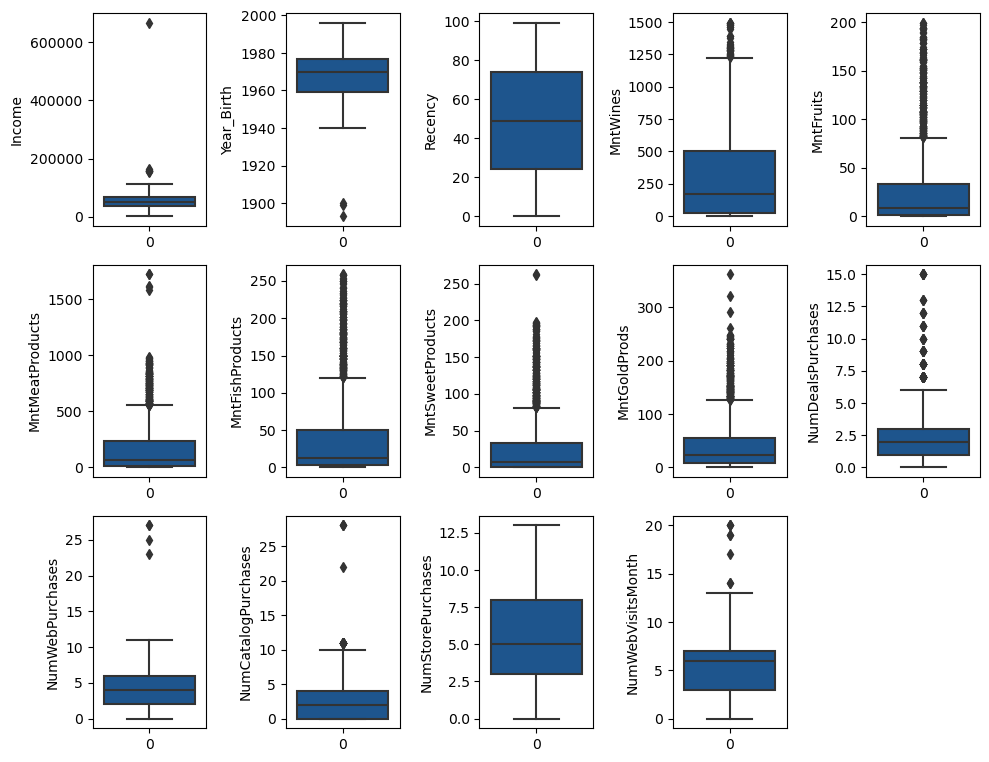

In [28]:
plt.figure(figsize=(10,10))
ax=1
for i in box_plot_cols:
    plt.subplot(4,5,ax)
    sns.boxplot(data1[i])
    plt.ylabel(f"{i}")
    ax+=1
plt.tight_layout()
plt.show()

- It looks sane to remove outliers for Year_Birth column only. Rest columns' outliers might be important.

In [29]:
data1 = data1[data1['Year_Birth']>1900].reset_index(drop=True)

### Feature Engineering

- We will be extracting features as-
1. Age variable inplace of Year_Birth
2. Num_Days variable- will be the number of days a customer is associated with the company
3. Family- number of family members
4. Total_Purchase- total purchase from Web, Catlogue, Store
5. Total_Spent- the sum of amount spent on product categories
6. Total_Campaign_Acc- Total acceptance of advertising campaigns

In [30]:
data1['Age'] = 2024 - data1['Year_Birth']
data1['Num_Days_Cust'] = data1['Dt_Customer'].max() - data1['Dt_Customer']
data1['Family'] = data1['Marital_Status']+data1['Kidhome']+data1['Teenhome']
data1['Total_Purchase'] = data1['NumWebPurchases']+data1['NumCatalogPurchases']+data1['NumStorePurchases']
data1['Total_Spent'] = data1.filter(like='Mnt').sum(axis=1)
data1['Total_Campaign_Acc'] = data1.filter(like='Accepted').sum(axis=1)+data1['Response']

In [31]:
data1[['Age','Num_Days_Cust','Family','Total_Purchase','Total_Spent','Total_Campaign_Acc']].head()

,Age,Num_Days_Cust,Family,Total_Purchase,Total_Spent,Total_Campaign_Acc
0,54,13 days,2.0,14,1190,1
1,63,14 days,1.0,17,577,2
2,66,47 days,3.0,10,251,0
3,57,49 days,4.0,3,11,0
4,35,82 days,2.0,6,91,2


In [32]:
data1['Num_Days_Cust'] = data1['Num_Days_Cust'].astype(str).str.replace(" days",'')
data1['Num_Days_Cust'] = pd.to_numeric(data1['Num_Days_Cust'],downcast='integer')

In [33]:
data1.drop(columns=['Year_Birth','Dt_Customer'], inplace=True)

### Exploratory Data Analysis(EDA)

In [34]:
#data1 = data1.astype(float)

In [35]:
cat_cols = [i for i in data1.columns if data1[i].nunique()<5]
cat_cols.extend(['Country','Education'])

In [36]:
data1.drop(columns=cat_cols).astype(float).describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Num_Days_Cust,Family,Total_Purchase,Total_Spent,Total_Campaign_Acc
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,52236.696036,49.104604,303.995530,26.270451,166.916853,37.523022,27.068842,43.968708,2.326777,4.087170,2.662494,5.794367,5.319177,55.098346,353.790344,2.699151,12.544032,605.743406,0.447027
std,25043.111847,28.956073,336.574382,39.715972,225.661158,54.639909,41.293949,52.054318,1.932923,2.779461,2.923456,3.250940,2.426386,11.701917,202.137961,0.890852,7.205919,601.840466,0.890964
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,1.000000,0.000000,5.000000,0.000000
25%,35523.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,47.000000,181.000000,2.000000,6.000000,69.000000,0.000000
50%,51717.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,54.000000,356.000000,3.000000,12.000000,396.000000,0.000000
75%,68281.000000,74.000000,504.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,65.000000,529.000000,3.000000,18.000000,1045.000000,1.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,84.000000,699.000000,5.000000,32.000000,2525.000000,5.000000


In [37]:
data1.head()

,Income,Marital_Status,Education,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Response,Complain,Country,Age,Num_Days_Cust,Family,Total_Purchase,Total_Spent,Total_Campaign_Acc
0,84835.0,2.0,Graduation,0,0,0,189,104,379,111,...,0,1,0,SP,54,13,2.0,14,1190,1
1,57091.0,1.0,Graduation,0,0,0,464,5,64,7,...,1,1,0,CA,63,14,1.0,17,577,2
2,67267.0,2.0,Graduation,0,1,0,134,11,59,15,...,0,0,0,US,66,47,3.0,10,251,0
3,32474.0,2.0,Graduation,1,1,0,10,0,1,0,...,0,0,0,AUS,57,49,4.0,3,11,0
4,21474.0,1.0,Graduation,1,0,0,6,16,24,11,...,0,1,0,SP,35,82,2.0,6,91,2


- Data Distribution

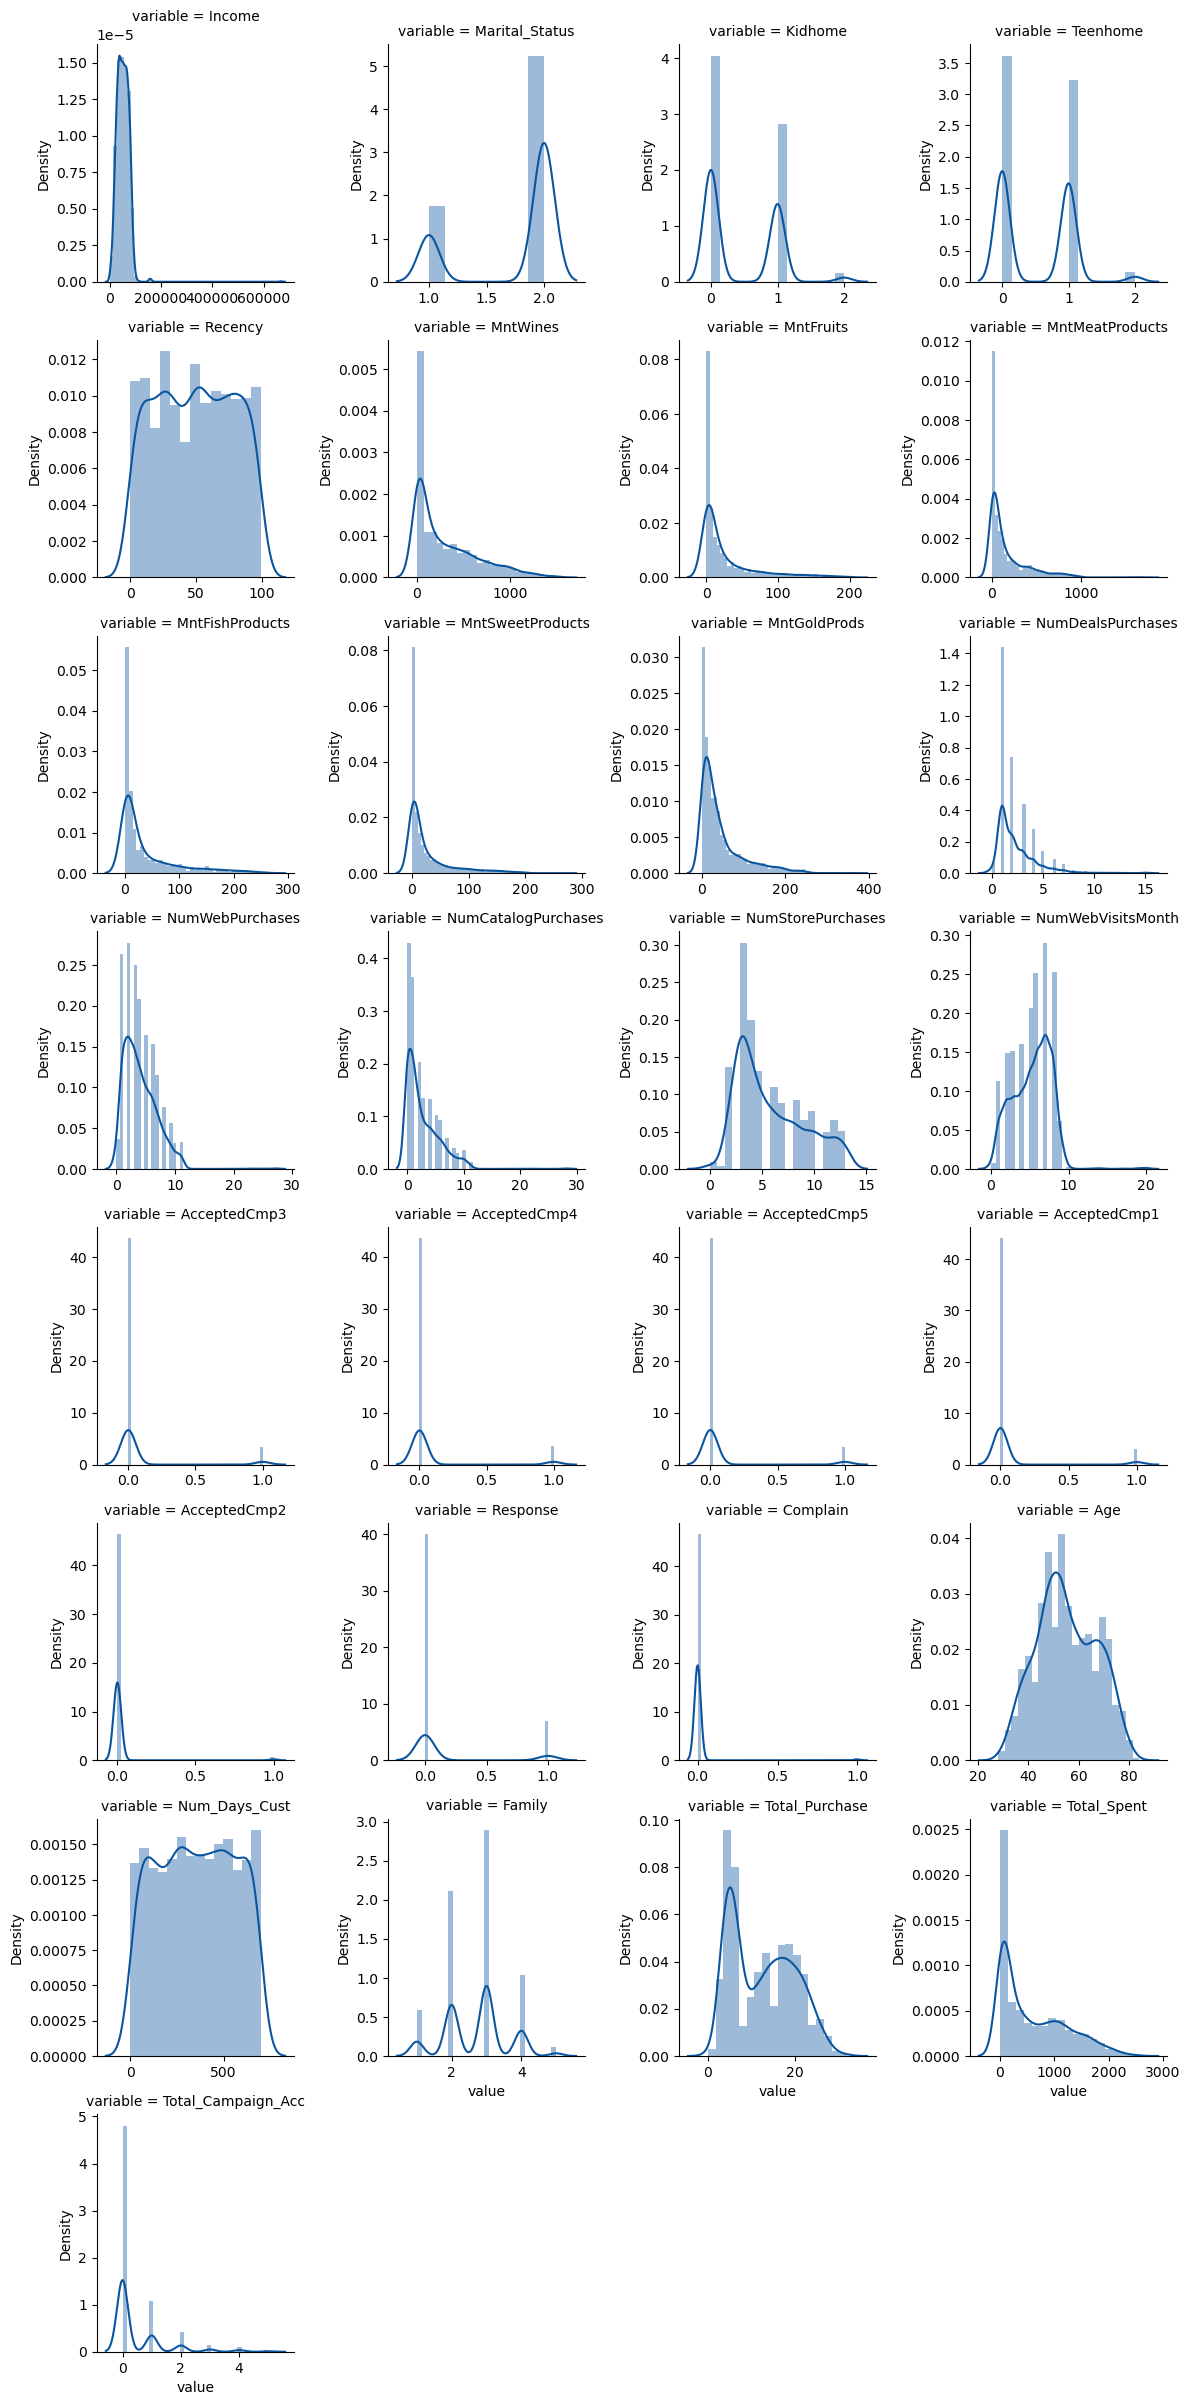

In [38]:
hist = pd.melt(data1.drop(columns=['Education', 'Country']), value_vars=data1.drop(columns=['Education', 'Country']))
hist = sns.FacetGrid(hist, col='variable',col_wrap=4,sharex=False, sharey=False)
hist.map(sns.distplot, 'value')
plt.show()

- Let's see how many customers accepted the campaign

In [39]:
data1['is_accepted'] = data1['Total_Campaign_Acc'].apply(lambda x: "Accepted" if x > 0 else "Not Accepted")

In [40]:
data1.head()

,Income,Marital_Status,Education,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Response,Complain,Country,Age,Num_Days_Cust,Family,Total_Purchase,Total_Spent,Total_Campaign_Acc,is_accepted
0,84835.0,2.0,Graduation,0,0,0,189,104,379,111,...,1,0,SP,54,13,2.0,14,1190,1,Accepted
1,57091.0,1.0,Graduation,0,0,0,464,5,64,7,...,1,0,CA,63,14,1.0,17,577,2,Accepted
2,67267.0,2.0,Graduation,0,1,0,134,11,59,15,...,0,0,US,66,47,3.0,10,251,0,Not Accepted
3,32474.0,2.0,Graduation,1,1,0,10,0,1,0,...,0,0,AUS,57,49,4.0,3,11,0,Not Accepted
4,21474.0,1.0,Graduation,1,0,0,6,16,24,11,...,1,0,SP,35,82,2.0,6,91,2,Accepted


In [41]:
count = data1['is_accepted'].value_counts()
labels = count.index.tolist()

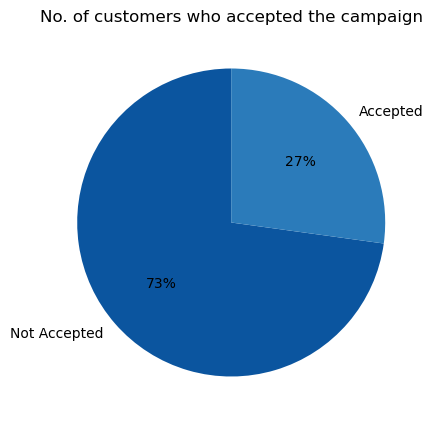

In [42]:
plt.figure(figsize=(5,5))
sns.color_palette('pastel')
plt.pie(count, labels = labels, autopct='%.f%%', startangle=90)
plt.title("No. of customers who accepted the campaign", fontsize=12)
plt.show()

- 73% of the clients didn't accept any of the advertise campaign

In [43]:
data1.columns

Index(['Income', 'Marital_Status', 'Education', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Age', 'Num_Days_Cust', 'Family',
       'Total_Purchase', 'Total_Spent', 'Total_Campaign_Acc', 'is_accepted'],
      dtype='object')

In [44]:
AcceptedCmp = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']

campaign = pd.DataFrame(data1[AcceptedCmp].mean()*100, columns=['percent']).reset_index()
campaign

,index,percent
0,AcceptedCmp1,6.437193
1,AcceptedCmp2,1.341082
2,AcceptedCmp3,7.286544
3,AcceptedCmp4,7.465355
4,AcceptedCmp5,7.241842
5,Response,14.930711


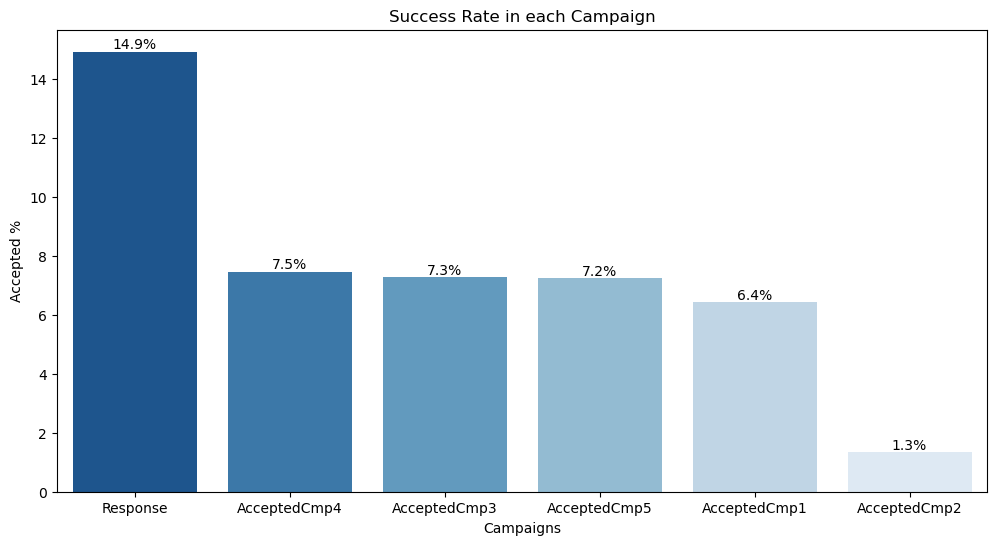

In [45]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='index', y='percent', data=campaign.sort_values('percent', ascending=False))
plt.xlabel('Campaigns')
#plt.xticks(rotation=45)
plt.ylabel('Accepted %')
plt.title("Success Rate in each Campaign")

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()

- The highest acceptance rate of an advertising campaign is the last campaign(Response)
- The lowest acceptance rate of an advertising campaign is the second campaign(AcceptedCmp2)

In [46]:
data1.columns

Index(['Income', 'Marital_Status', 'Education', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Age', 'Num_Days_Cust', 'Family',
       'Total_Purchase', 'Total_Spent', 'Total_Campaign_Acc', 'is_accepted'],
      dtype='object')

In [47]:
accepted = [i for i in data1.filter(like='Accepted').columns]

accepted.extend(['Country','Education','is_accepted','Response'])

col_drop_corr = accepted

In [48]:
data_corr = data1.drop(columns=col_drop_corr).corr()

In [49]:
corr_columns = data_corr.loc['Total_Campaign_Acc']

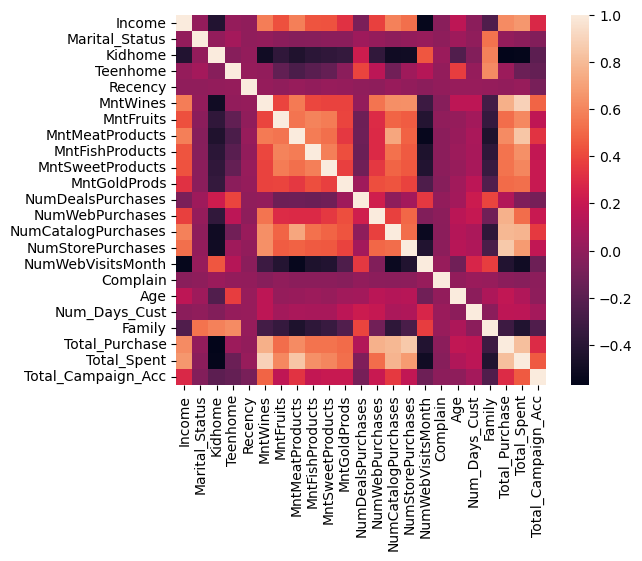

In [50]:
sns.heatmap(data_corr, square=True)
plt.show()

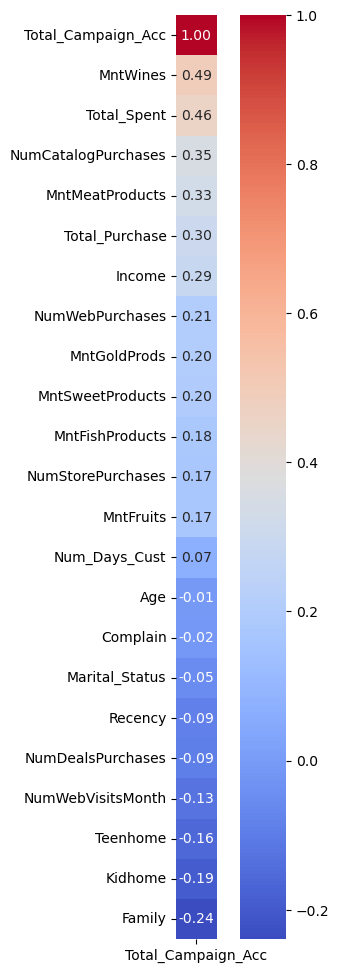

In [51]:
plt.figure(figsize=(6,12))
sns.heatmap(pd.DataFrame(corr_columns.sort_values(ascending=False)),annot=True,cmap='coolwarm',square=True, fmt='.2f')
plt.show()

- After presenting the correlation between Total_Campaign_Acc and all relevent variables, we noe will present the most important variables that have an impacat on Total_Campaign_Acc variable.
- Perhaps, the benefit of this is that we understand that some variables even though do not have significant relationship effect, in fact have a strong effect.
- For example, income doesn't have a strong relationship, but it affects the increase in the quantity purchased(effectively Total_Spent). In other words, greater the income, greater the spending leading to greater Total_Campaign_Acc

### Random Forest Model

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
col_drop_corr.extend(['Total'])

In [54]:
X = data1.drop(columns=['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Country','Education','is_accepted','Response','Total_Campaign_Acc']).astype(float)
y = data1['Total_Campaign_Acc'].astype(int)

In [55]:
rfc = RandomForestClassifier(random_state=6)
rfc.fit(X,y)
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [56]:
importances[indices]

array([0.10453873, 0.08634451, 0.08282357, 0.06627089, 0.06321326,
       0.06299358, 0.06154383, 0.05389896, 0.04939016, 0.04605112,
       0.04497656, 0.04449959, 0.04445208, 0.04336538, 0.03789551,
       0.0343761 , 0.0251378 , 0.02081892, 0.01103464, 0.00889407,
       0.00675898, 0.00072176])

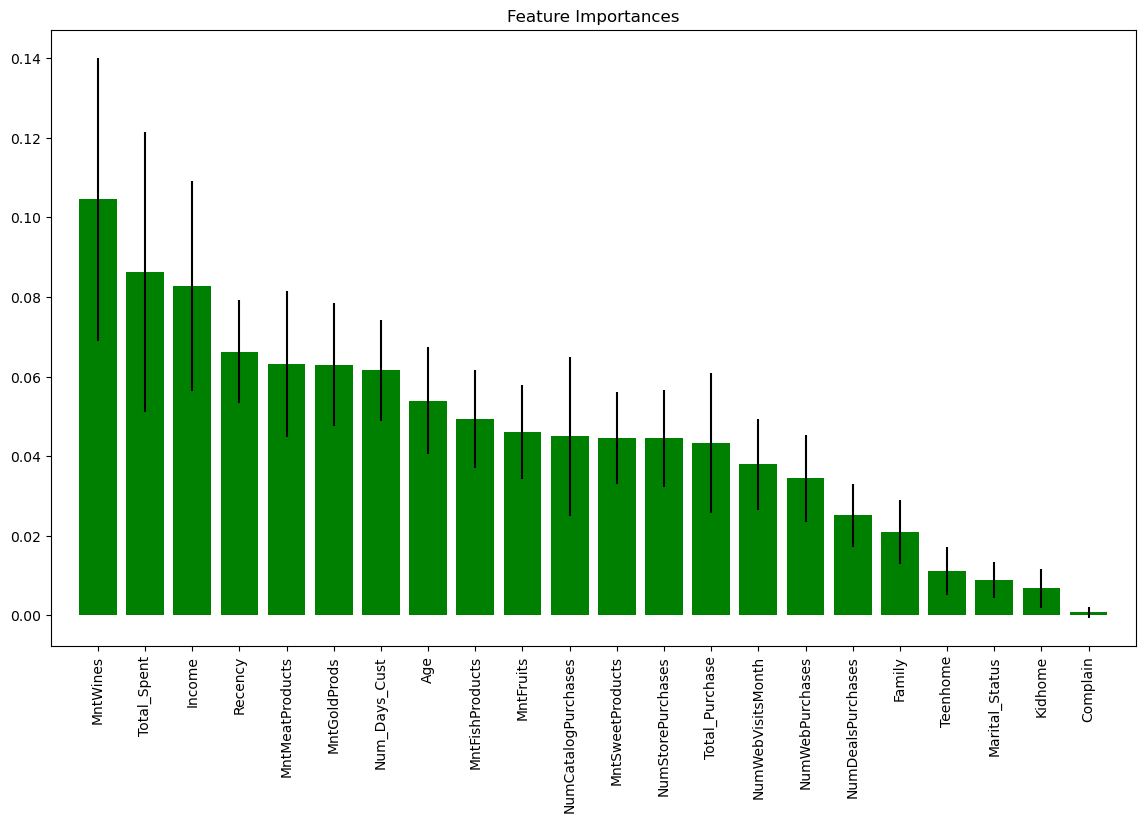

In [57]:
plt.figure(1, figsize=(14,8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color='g', yerr=std[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1,X.shape[1]])
plt.show()

- From the above analysis we can conclude that the acceptance of campaign is "largely" dependent on MntWines, Total_Spent, Income, Recency, MntMeatProducts and MntGoldProds 

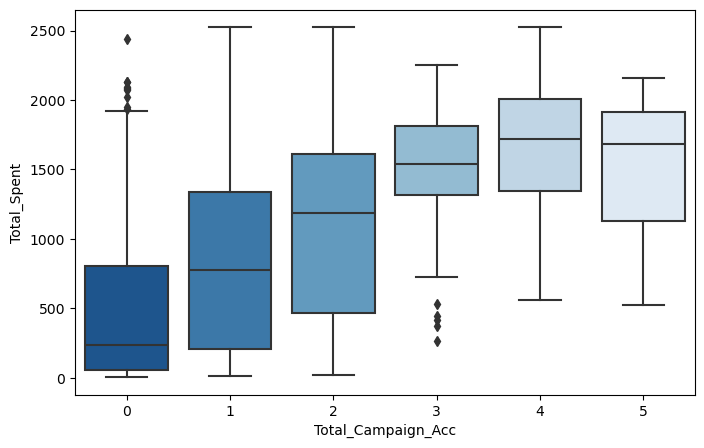

In [58]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Total_Campaign_Acc', y='Total_Spent', data= data1, palette='Blues_r')
plt.show()

- A general trend can be seen that with increasing Total_Spent amount chances of acceptance of campaigns also increases

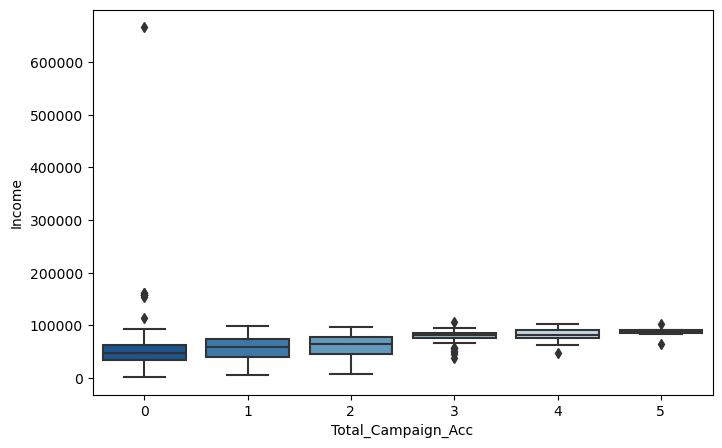

In [59]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Total_Campaign_Acc', y='Income', data= data1, palette='Blues_r')
plt.show()

-  A direct relationship can be observed as higher the incomes higher is the rate of acceptance of the campaign

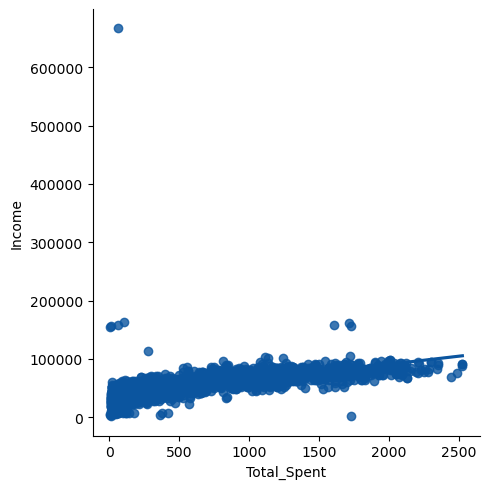

In [60]:
sns.lmplot(x='Total_Spent', y='Income', data=X);

- This yet again proves our point that higher the incomes, higher is the spending ultimately leading to higher rate of acceptance of campaign

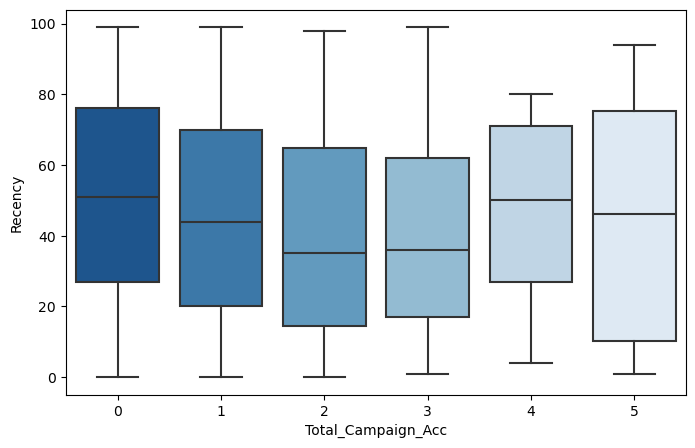

In [61]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Total_Campaign_Acc', y='Recency', data= data1, palette='Blues_r')
plt.show()

- With Recency(No. of days since the last purchase) being less acceptance of campaign is more, but again for the cases with recency period of less than 95 days there is higher acceptance of the adv campaigns

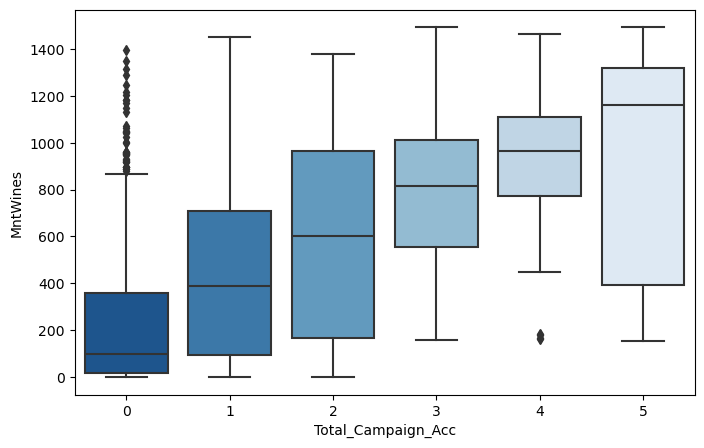

In [62]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Total_Campaign_Acc', y='MntWines', data= data1, palette='Blues_r')
plt.show()

- Again a positive relationship between Total_Campaign_Acc and MntWines

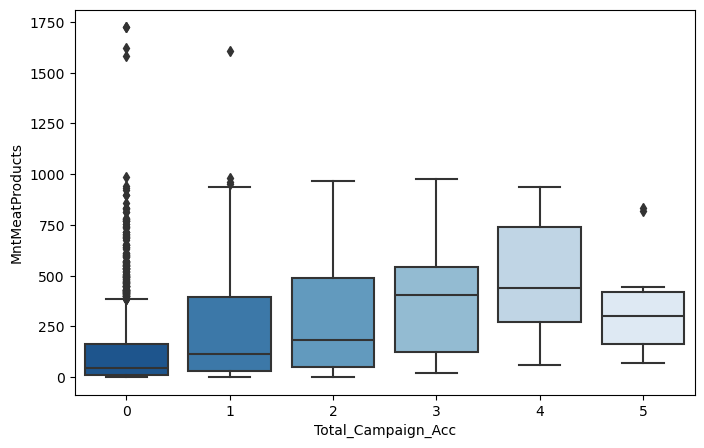

In [63]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Total_Campaign_Acc', y='MntMeatProducts', data= data1, palette='Blues_r')
plt.show()

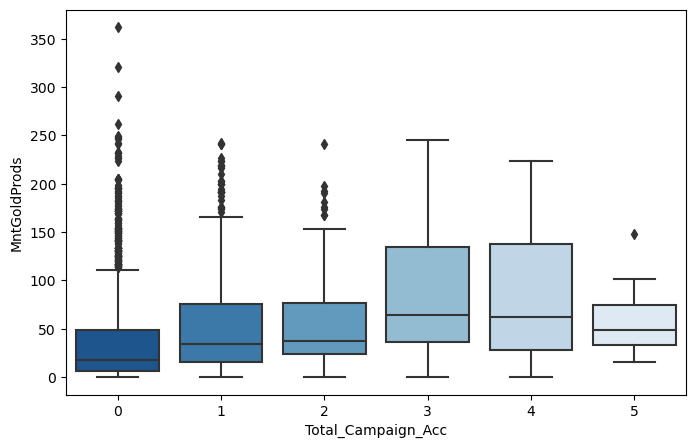

In [64]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Total_Campaign_Acc', y='MntGoldProds', data= data1, palette='Blues_r')
plt.show()

- MntMeatProducts and MntGoldProds are positively related with the Total_Campaign_Acc but not like MntWines

- This also explains why the best selling products are from these three categories

In [65]:
products = pd.DataFrame(data1.filter(like='Mnt').sum(), columns=['Sum']).sort_values('Sum', ascending=False).reset_index()
products

,index,Sum
0,MntWines,680038
1,MntMeatProducts,373393
2,MntGoldProds,98358
3,MntFishProducts,83939
4,MntSweetProducts,60553
5,MntFruits,58767


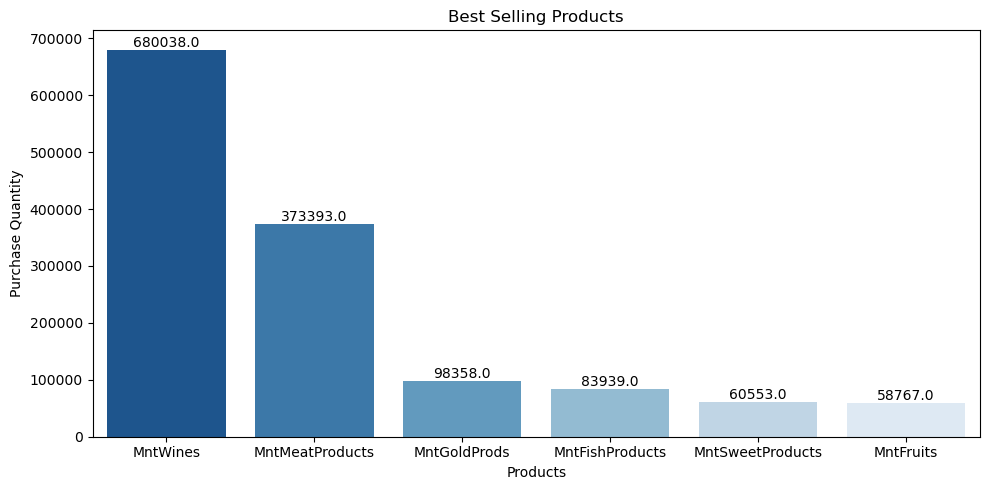

In [66]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='index',y='Sum', data=products)
plt.xlabel("Products")
plt.ylabel("Purchase Quantity")
plt.title("Best Selling Products")
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()

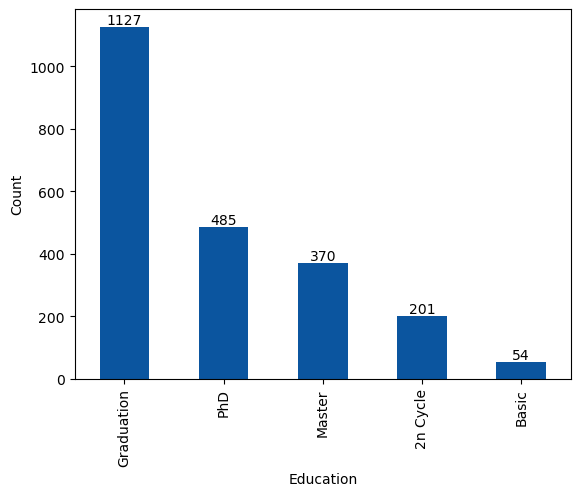

In [67]:
ax = data1.Education.value_counts().plot.bar()
ax.bar_label(ax.containers[0])
plt.ylabel("Count")
plt.show()

In [68]:
result = data1[['Education', 'Total_Campaign_Acc']].groupby(['Education'], as_index=False).mean().sort_values('Total_Campaign_Acc', ascending=False).round(2)
result

,Education,Total_Campaign_Acc
4,PhD,0.54433
2,Graduation,0.439219
3,Master,0.432432
0,2n Cycle,0.363184
1,Basic,0.148148


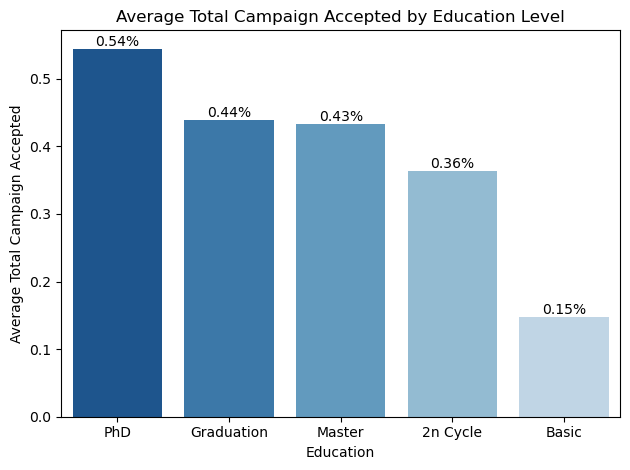

In [69]:
ax = sns.barplot(x='Education', y='Total_Campaign_Acc', data=result)
plt.xlabel("Education")
plt.ylabel("Average Total Campaign Accepted")
plt.title("Average Total Campaign Accepted by Education Level")

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

- Acceptance rate among the PhD holders is more than that of Graduates

- Let's try to figure out what is making the campaigns more appealing for the PhD holders

In [70]:
average_income = data1.groupby('Education')['Income'].mean().reset_index().sort_values('Income')
average_income

,Education,Income
1,Basic,20306.259259
0,2n Cycle,47694.317184
2,Graduation,52715.755781
3,Master,52908.47637
4,PhD,56048.660323


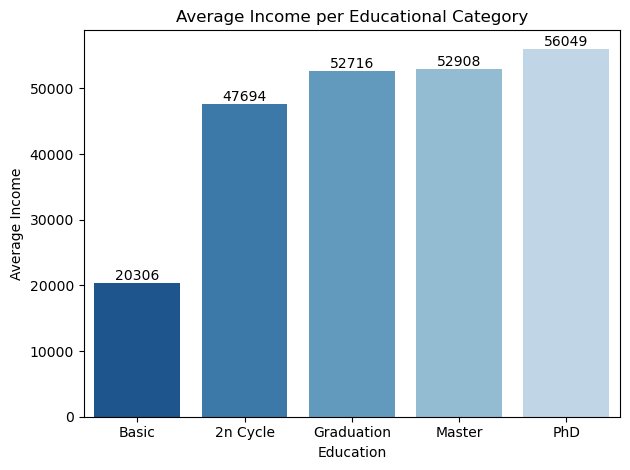

In [71]:
ax = sns.barplot(x='Education', y='Income', data=average_income)
plt.xlabel("Education")
plt.ylabel("Average Income")
plt.title("Average Income per Educational Category")

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

- It can be inferred that the PhD holders are the ones with higher average Incomes than Master or Graduates

- Let's Verify this hypothesis

### Hypothesis Testing

In [72]:
data1['Education'] = data1.Education.map({'Basic':1,'2n Cycle':2,'Graduation':3,'Master':4,'PhD':5})

- we need to know if the data follows a normal distribution or not. If the data is normally distributed we will use the parameteric test, if not we will try to normalize the data first and then apply parameteric test or directly use a non-parameteric test.


  - H0 Null Hypothesis: Data is normally distributed
  - H1 Alternative Hypothesis: Data is not normally distributed
  
1. if p_value <= alpha(significance level) : reject H0 --> distribution is not normal
2. if p_value > alpha : fail to reject H0 --> distribution is normal
- where alpha is 5% (0.05)

#### Statistical Tests for checking Normality of the data:
1. Shapiro-Wilk Test
2. Anderson-Darling Test

In [73]:
from scipy.stats import shapiro

In [74]:
test_data = data1[['Income', 'Education']]

In [75]:
def normality_test(columns):
    for column in columns:
        statistics, p_value = shapiro(test_data[column])
         
        alpha = 0.05
        if p_value <= alpha:
            print(f'{column}: p_value: {p_value:.2f} <= alpha: {alpha}, We reject the Null hypothesis. Hence, the Data is not Normally Distributed')
        else:
            print(f'{column}: p_value: {p_value:.2f} > alpha: {alpha}, We fail to reject the Null Hypothesis. Hence, the Data is Normally Distributed')

In [76]:
normality_test(test_data)

Income: p_value: 0.00 <= alpha: 0.05, We reject the Null hypothesis. Hence, the Data is not Normally Distributed
Education: p_value: 0.00 <= alpha: 0.05, We reject the Null hypothesis. Hence, the Data is not Normally Distributed


- Thus, Data is not normally distributed. So, we will use the non-parameteric test

#### Tests to compare the two groups:
1. Mann-Whitney U test

- Defining the Hypotheses:
    - H0 Null hypothesis: mean of the two groups are equal(no difference)
    - H1 Alternative hypothesis: meanof the two groups are not equal(difference)

In [77]:
from scipy.stats import mannwhitneyu

In [78]:
#'Basic':1,'2n Cycle':2,'Graduation':3,'Master':4,'PhD':5
income_group_1 = data1[data1['Education']==5]['Income'].astype(float)
income_group_2 = data1[data1['Education']==3]['Income'].astype(float)

In [79]:
statistics, p_value = mannwhitneyu(income_group_1, income_group_2)

alpha = 0.05
if p_value <= alpha:
    print('We reject the Null Hypothesis. Hence, there is a significant difference between the means of two groups')
else:
    print( 'We fail to reject the Null Hypothesis. Hence, there is no significant difference between the means of two groups')


We reject the Null Hypothesis. Hence, there is a significant difference between the means of two groups


- Increasing income leads to increased spending, leading to increased acceptance of the advertisement campaigns. This also explains the greater acceptance rate among the PhD holders

- Let's analyse based on the Country how the acceptance rate varies taking into consideration the Income factor

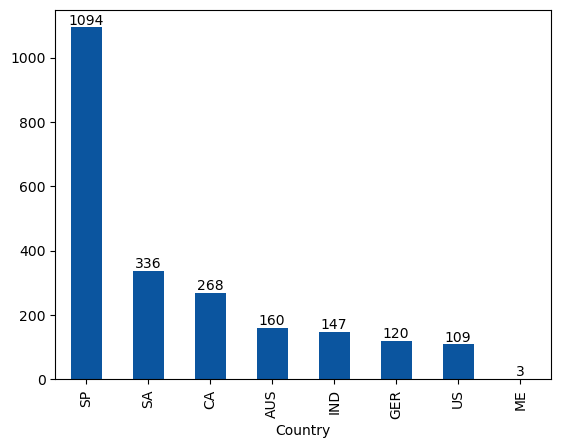

In [80]:
ax = data1.Country.value_counts().plot.bar()
ax.bar_label(ax.containers[0])
plt.show()

In [81]:
data1.head()

,Income,Marital_Status,Education,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Response,Complain,Country,Age,Num_Days_Cust,Family,Total_Purchase,Total_Spent,Total_Campaign_Acc,is_accepted
0,84835.0,2.0,3,0,0,0,189,104,379,111,...,1,0,SP,54,13,2.0,14,1190,1,Accepted
1,57091.0,1.0,3,0,0,0,464,5,64,7,...,1,0,CA,63,14,1.0,17,577,2,Accepted
2,67267.0,2.0,3,0,1,0,134,11,59,15,...,0,0,US,66,47,3.0,10,251,0,Not Accepted
3,32474.0,2.0,3,1,1,0,10,0,1,0,...,0,0,AUS,57,49,4.0,3,11,0,Not Accepted
4,21474.0,1.0,3,1,0,0,6,16,24,11,...,1,0,SP,35,82,2.0,6,91,2,Accepted


In [82]:
result = data1[['Country', 'Total_Spent']].groupby(['Country'], as_index=False).mean().sort_values(by='Total_Spent',ascending=False).round(2)
result

,Country,Total_Spent
4,ME,1040.666667
1,CA,628.850746
5,SA,628.122024
2,GER,624.275
7,US,622.770642
6,SP,603.626143
0,AUS,561.01875
3,IND,540.272109


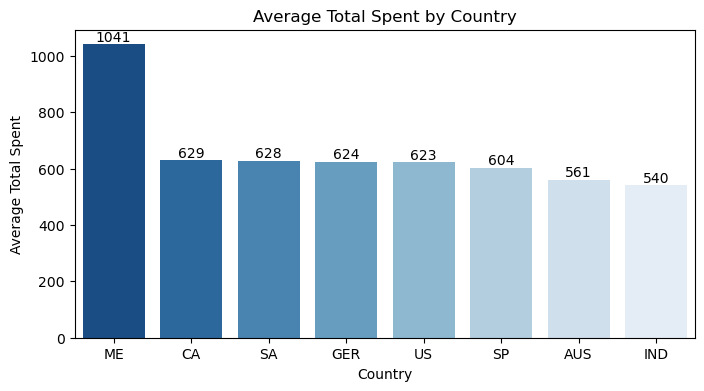

In [83]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x='Country', y='Total_Spent', data=result, palette='Blues_r')
plt.xlabel("Country")
plt.ylabel("Average Total Spent")
plt.title("Average Total Spent by Country")

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.show()

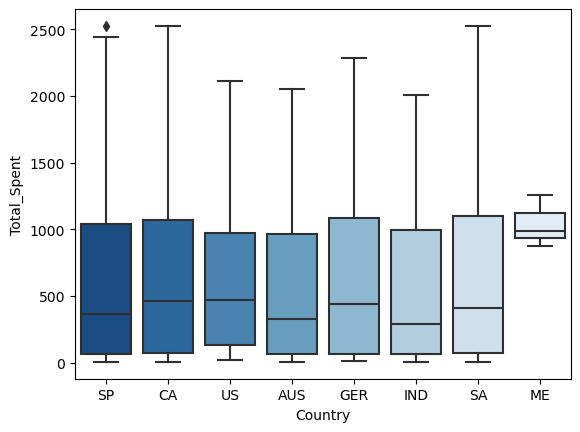

In [84]:
sns.boxplot(x='Country', y='Total_Spent', data=data1, palette='Blues_r')
plt.show()

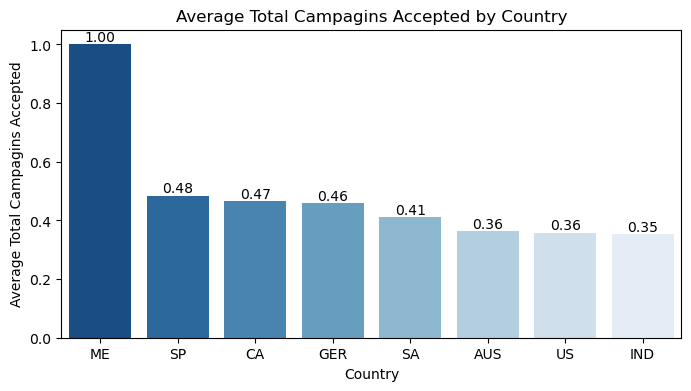

In [85]:
result = data1[['Country', 'Total_Campaign_Acc']].groupby(['Country'], as_index=False).mean().sort_values(by='Total_Campaign_Acc', ascending=False).round(2)
result

plt.figure(figsize=(8,4))
ax = sns.barplot(x='Country', y='Total_Campaign_Acc', data=result, palette='Blues_r')
plt.xlabel("Country")
plt.ylabel("Average Total Campagins Accepted")
plt.title("Average Total Campagins Accepted by Country")

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.show()

- Acceptance rate in Countries SP, CA, GER are very low even when they represent majority of the clients

### Conclusions and Recommendations

- After analyzing the data and discovering the reasons for the lack of increase in accepatance of our advertising campaigns, we found that our advertising campaigns are directed to the people with the highest income, even though most of our clients are not those with the highest income. 
- We found this when we compared income, Total_Spent and the Total_Campaign_Acc of the advertising Campaigns between PhD holders and Graduates.
- We also noticed that our best-selling products are expensive things such as wines, gold and meat and countries with higher incomes were more likely to spend, thus accepting the advertising campaigns.

    - We must, therefore, divide our customers into groups and direct our advertising campaigns based on the income and products that are appropriate for this group.